# Libraries

In [53]:
from _ctypes import LoadLibrary as _dlopen
_dlopen("D:\\Sangwons_Room\\00_SoftWares\\Anaconda\\envs\\torch\\Library\\bin\\geos.dll", 0)

# nuscenes-devkit
from nuscenes.nuscenes import NuScenes

# nuscenes-map expansion
from utils.custom_map_api_expansion import CustomNuScenesMap

# nuscenes-devkit-utils
from nuscenes.utils.data_classes import LidarPointCloud, RadarPointCloud, Box
from nuscenes.utils.geometry_utils import view_points, transform_matrix

from pyquaternion import Quaternion


from functools import reduce
import os

import numpy as np
import pandas as dp
import matplotlib.pyplot as plt
import plotly.express as px
import tqdm

from torch.utils.data import Dataset, DataLoader
%matplotlib inline

# Set  Parameters

In [54]:
locations = ['singapore-onenorth', 'singapore-hollandvillage', 'singapore-queenstown', 'boston-seaport']
version = 'v1.0-mini'
dataroot = './data/sets/nuscenes'

# Load Informations

In [55]:
nusc = NuScenes(version=version, dataroot=dataroot, verbose=True)
nusc_location = dict()
for loc in locations:
    nusc_location[loc] = CustomNuScenesMap(dataroot=dataroot, map_name=loc)

Loading NuScenes tables for version v1.0-mini...
Loading nuScenes-lidarseg...
32 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
404 lidarseg,
Done loading in 0.888 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


# Check Maps

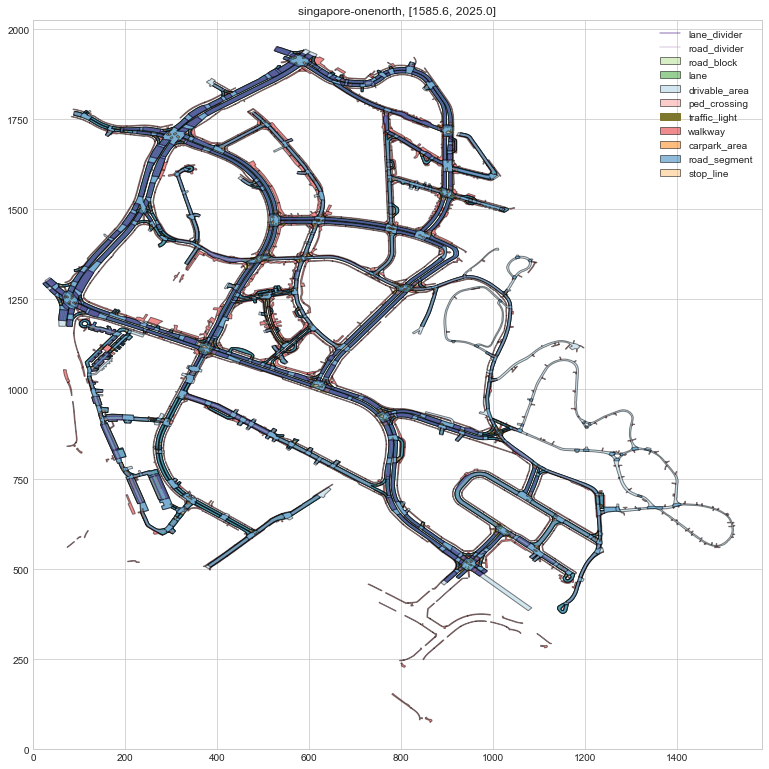

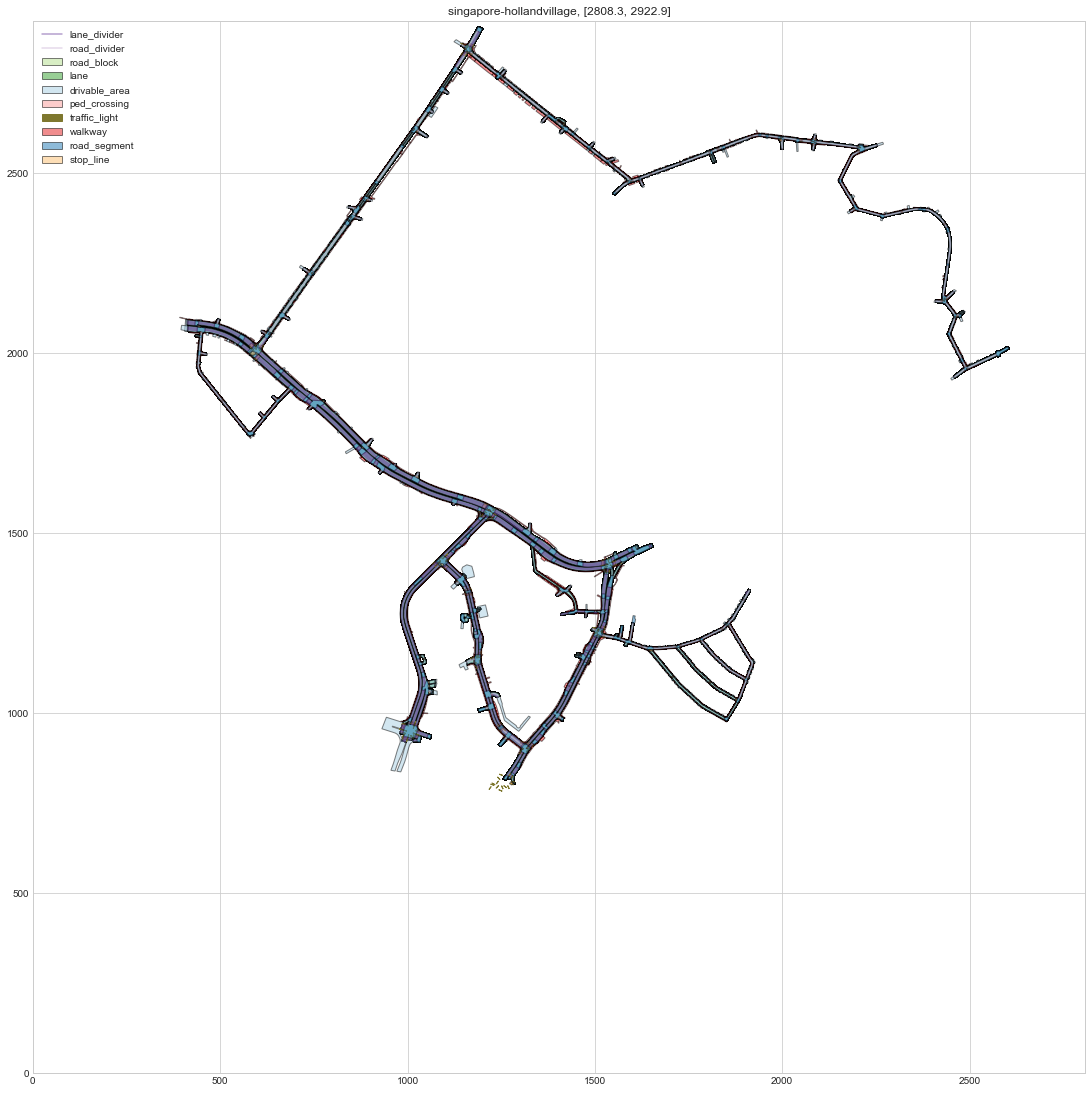

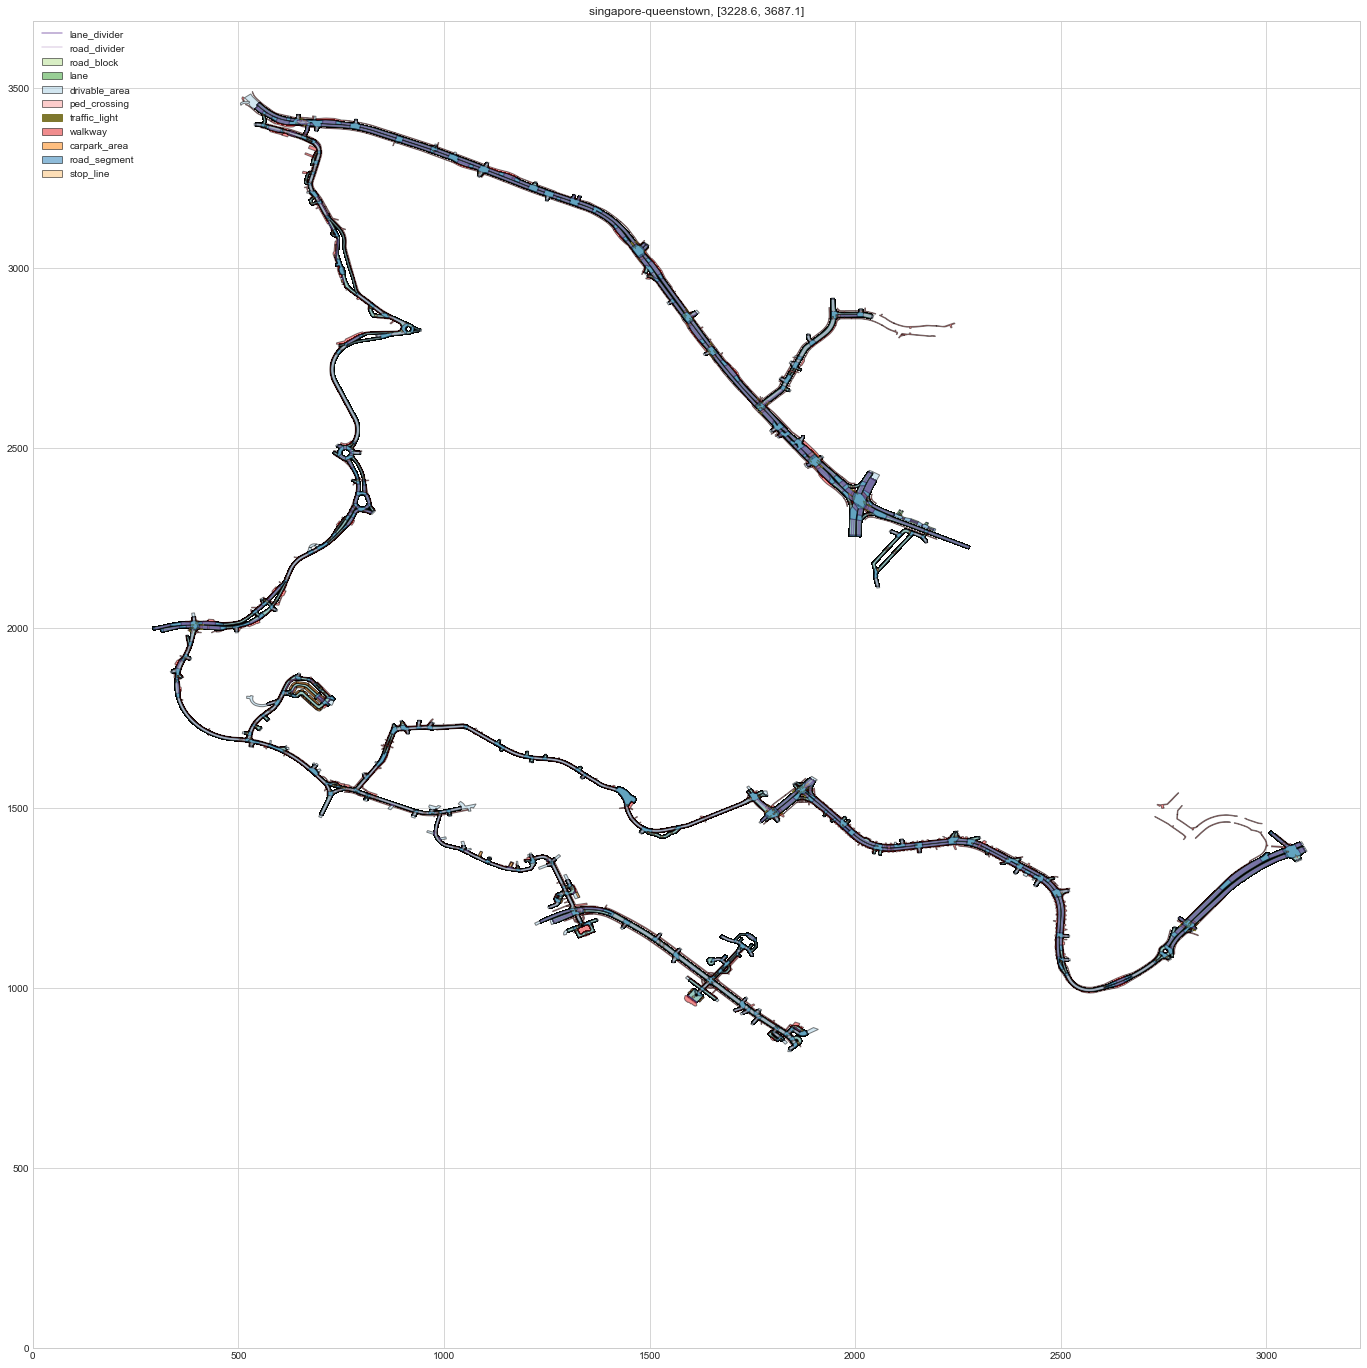

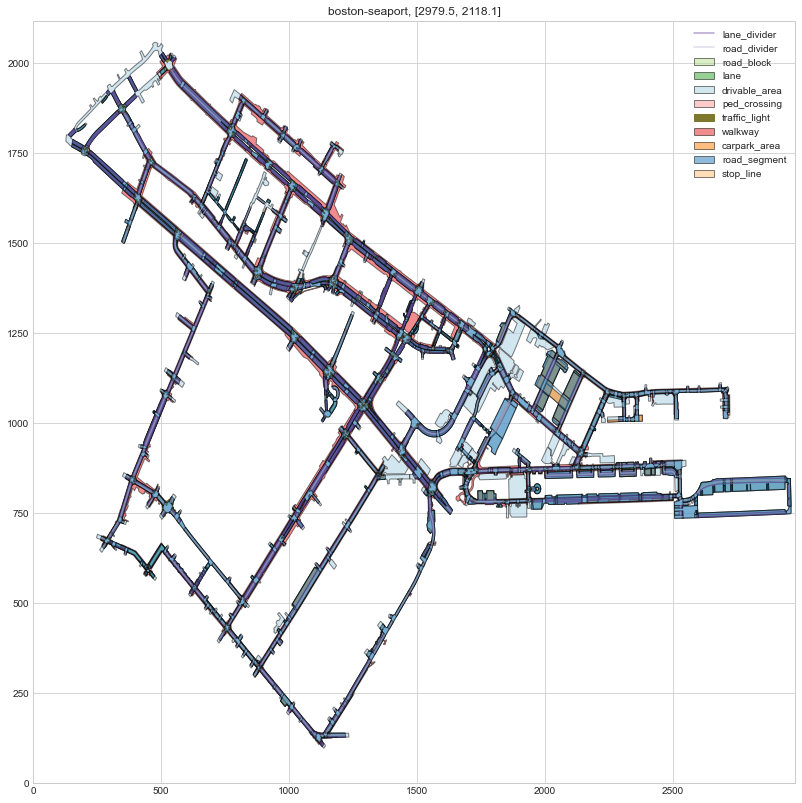

In [10]:
for location in locations:
    nusc_map = nusc_location[location]
    fig, ax = nusc_map.render_layers(nusc_map.non_geometric_layers, figsize=1)
    ax.set_title(f"{location}, {nusc_map.get_size()}")
plt.show()

# Data Analysis

In [24]:
info = []

for location in locations:
    nusc_map = nusc_location[location]
    map_size = nusc_map.get_size()
    
    for x in np.arange(100, map_size[0] + 200, 200):
        for y in np.arange(100, map_size[0] + 200, 200):
            objects_list = nusc_map.get_closest_layers(nusc_map.non_geometric_layers, (x, y))
            for layer in nusc_map.non_geometric_layers:
                objects = objects_list[layer]
                for object_ in objects:
                    info.append([location, layer, x, y, object_.shape[0]])
    

KeyError: 'exterior_node_tokens'

In [23]:
objects_list = nusc_map.get_closest_layers(nusc_map.non_geometric_layers, (x, y))

KeyError: 'exterior_node_tokens'

In [37]:
nusc_map = nusc_location['singapore-hollandvillage']

nusc_map.get_records_in_patch([100,100,200,200], ['traffic_light'], mode = 'within')

'traffic_light'